# Principal Component Analysis with Cancer Data

In [316]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [317]:
colnames= ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
can_df= pd.read_csv("breast-cancer-wisconsin.data.txt", delimiter=",", names= colnames, na_values='?')

In [318]:
can_df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [319]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [320]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [321]:
can_df.shape

(699, 11)

In [322]:
can_df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [323]:
print(colnames)
newcol=colnames
del newcol[0]
print(newcol)


['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [324]:
for col in newcol:
    print("The attribute {a} has {b} unique values.".format(a=col, b=len(can_df[col].unique())))
    print(can_df[col].value_counts())
    print("mode is {a}".format(a=can_df[col].value_counts().count()))

The attribute Clump Thickness has 10 unique values.
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64
mode is 10
The attribute Uniformity of Cell Size has 10 unique values.
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64
mode is 10
The attribute Uniformity of Cell Shape has 10 unique values.
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64
mode is 10
The attribute Marginal Adhesion has 10 unique values.
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64
mode is 10
The attribute Single Epithelial Cell Size has 10 unique values.
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Na

In [325]:
print("Other than Sample code number, everything is categorical data . Checking mean and median do not reveals any insight. So check mode")

Other than Sample code number, everything is categorical data . Checking mean and median do not reveals any insight. So check mode


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [326]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [327]:
can_df.isna().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [328]:
can_df.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [329]:
can_df['Bare Nuclei'].isna().sum()

16

In [330]:
can_df["Bare Nuclei"].fillna(value=can_df["Bare Nuclei"].value_counts().count(), inplace=True)

In [331]:
can_df['Bare Nuclei'].isna().sum()

0

In [332]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [333]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [334]:
can_df.corr()["Class"]

Sample code number            -0.080226
Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.769854
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

In [335]:
# Check for correlation of variable

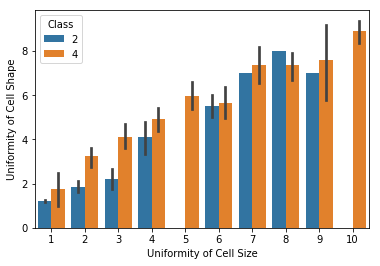

In [336]:
sns.barplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', hue='Class',  data= can_df );

Cell size and cell shape are highly correlated.
For the cell size category 10, class 2 doesnt exist. ie when cell size is 10, it is predicted to cancer.

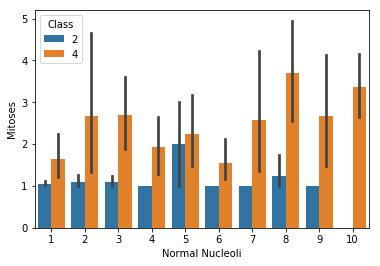

In [337]:
sns.barplot(x='Normal Nucleoli', y='Mitoses', hue='Class',  data= can_df );

For a class 2, across all categories of normal nucleoli, mitoses values seems to be 1. When mitoses is more than  1 in normal nucleoli, then it is class 4

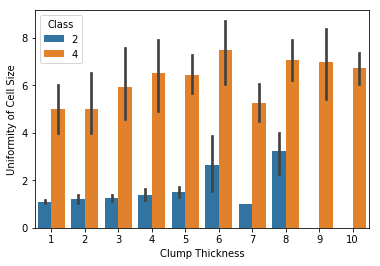

In [338]:
sns.barplot(x='Clump Thickness', y='Uniformity of Cell Size', hue='Class',  data= can_df );

Clump thickness and Cell size is positively correlated and also when clump thickness is category more than 8, then it is of class 4

In [339]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [340]:
#Let us check for pair plots

In [341]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [342]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [343]:
# PCA
# Step 1 - Create covariance matrix
y= can_df['Class']
can_df.drop(labels=['Sample code number','Class'], axis=1, inplace=True)

In [344]:
sc = StandardScaler()
X_std =  sc.fit_transform(can_df)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.55334612
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.65522779
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.68191638
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.62942618
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.54824996
  0.61698451 0.62978166 0.47978787]
 [0.55334612 0.65522779 0.68191638 0.62942618 0.54824996 1.00143266
  0.64865837 0.55692734 0.31398793]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.64865837
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.55692734
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.31398793
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [345]:
# Step 2- Get eigen values and eigen vector

In [346]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30342943  0.13011936 -0.00498355  0.86445225 -0.1052422   0.21371425
   0.11574351 -0.26265624  0.0675459 ]
 [-0.38299196  0.04159651 -0.73549858 -0.00281897  0.21232946 -0.47088839
  -0.1297214  -0.09254819 -0.13567721]
 [-0.37960913  0.08095085  0.66670259  0.04752603  0.16455864 -0.5965095
  -0.08964528  0.00386578 -0.10788165]
 [-0.33363794  0.04115654  0.04249215 -0.43344897 -0.35554879  0.06646245
   0.37565033 -0.65145203  0.03119551]
 [-0.3375863  -0.17231058  0.06532364 -0.09226933  0.38667131  0.46449238
   0.13879982  0.11205154 -0.66818779]
 [-0.32183181  0.29741531 -0.0690286  -0.05268086 -0.62476809  0.00488906
   0.11227525  0.61342052 -0.14552889]
 [-0.34764621  0.22504774  0.05797326 -0.18793793  0.02461383  0.37612931
  -0.75958323 -0.0798205   0.25376558]
 [-0.33808603 -0.0267171  -0.01668786 -0.10774363  0.40403289  0.11673791
   0.42649017  0.31034775  0.6465423 ]
 [-0.23049969 -0.89642885  0.00689718  0.06602555 -0.29435948 -0.03835916
  -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [347]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.8454515037597865, array([-0.30342943, -0.38299196, -0.37960913, -0.33363794, -0.3375863 ,
       -0.32183181, -0.34764621, -0.33808603, -0.23049969])), (0.7846498084330978, array([ 0.13011936,  0.04159651,  0.08095085,  0.04115654, -0.17231058,
        0.29741531,  0.22504774, -0.0267171 , -0.89642885])), (0.5399642786607964, array([ 0.86445225, -0.00281897,  0.04752603, -0.43344897, -0.09226933,
       -0.05268086, -0.18793793, -0.10774363,  0.06602555])), (0.47345682336198486, array([-0.1052422 ,  0.21232946,  0.16455864, -0.35554879,  0.38667131,
       -0.62476809,  0.02461383,  0.40403289, -0.29435948])), (0.3794986303933625, array([ 0.0675459 , -0.13567721, -0.10788165,  0.03119551, -0.66818779,
       -0.14552889,  0.25376558,  0.6465423 ,  0.11979206])), (0.3403122245919527, array([-0.26265624, -0.09254819,  0.00386578, -0.65145203,  0.11205154,
        0.61342052, -0.0798205 ,  0.31034775,  0.08071255])), (0.29767091695222575, array([ 0.11574351, -0.1297214 , -0.08964528, 

In [348]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


In [349]:
var_explained

[0.6485654346883376,
 0.0870585862798128,
 0.059910199730604984,
 0.05253105431674861,
 0.04210619043308966,
 0.037758374306975526,
 0.03302722938048857,
 0.029185280769880258,
 0.009857650094062174]

In [350]:
cum_var_exp

array([0.64856543, 0.73562402, 0.79553422, 0.84806528, 0.89017147,
       0.92792984, 0.96095707, 0.99014235, 1.        ])

In [351]:
P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

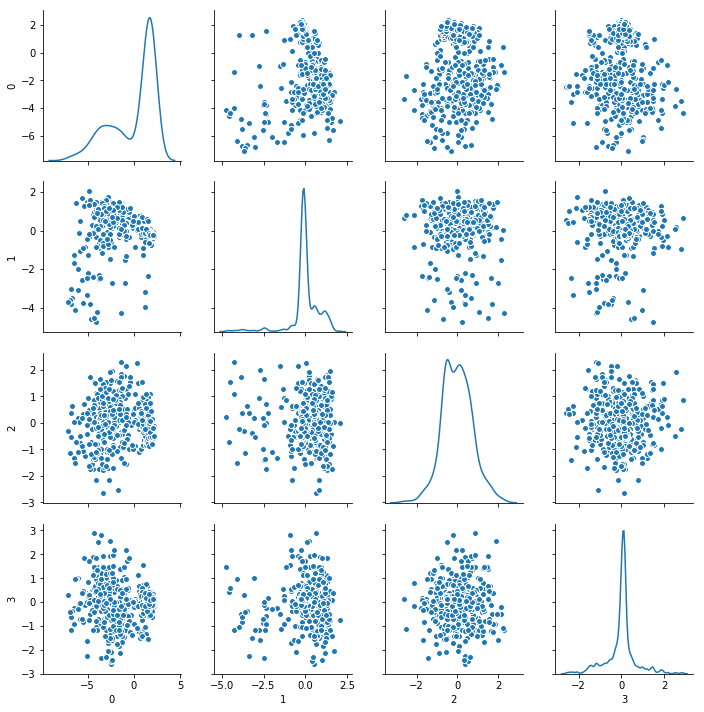

In [352]:
sns.pairplot(Proj_data_df, diag_kind='kde')

# Q10 Find correlation between components and features

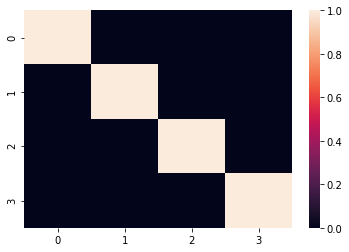

In [353]:
sns.heatmap(Proj_data_df.corr())

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [354]:
jokes_df= pd.read_csv("jokes.csv")

In [355]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [356]:
jokes_df.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [357]:
ratings= jokes_df.iloc[:200, 1:]
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [358]:
ratings.columns = np.arange(0,100)

In [359]:
ratings.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [361]:
ratings[ratings==99].count()

0      59
1      37
2      70
3      93
4       0
5      60
6       0
7       0
8      84
9      32
10     37
11     40
12      0
13     35
14      0
15      0
16      0
17      0
18      0
19      0
20      3
21     34
22     39
23     86
24     28
25     15
26      1
27     10
28      2
29     63
     ... 
70    131
71    135
72    136
73    136
74    138
75    136
76    137
77    134
78    135
79    136
80    131
81    132
82    132
83    133
84    129
85    128
86    128
87    130
88    135
89    125
90    134
91    129
92    125
93    125
94    129
95    129
96    121
97    133
98    123
99    133
Length: 100, dtype: int64

In [362]:
ratings.replace(to_replace=99,value=0,inplace=True)

In [363]:
ratings[ratings==99].count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [364]:
ratings[ratings=='99'].count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [367]:
ratings_diff = StandardScaler()
print(ratings_diff.fit(ratings))

StandardScaler(copy=True, with_mean=True, with_std=True)


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [380]:
newDataframe=pd.DataFrame()

In [381]:
newDataframe['Mean']=ratings_diff.mean_

In [384]:
newDataframe.tail()

,Mean
95,0.41755
96,0.75500
97,0.09370
98,0.13500
99,0.52440


In [382]:
newDataframe.Mean.sort_values(ascending=False).index.values[0:10]

array([49, 35, 52, 34, 28, 26, 61, 48, 31, 30], dtype=int64)